In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import xarray as xr
import hvplot.xarray
import hvplot.pandas

/srv/conda/envs/notebook/lib/python3.8/site-packages/holoviews/core/element.py:74: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if key is ():
/srv/conda/envs/notebook/lib/python3.8/site-packages/holoviews/core/layout.py:225: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if key is ():
/srv/conda/envs/notebook/lib/python3.8/site-packages/holoviews/element/tabular.py:60: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if heading is ():


In [2]:
from IPython import display
display.set_matplotlib_formats('retina')

In [3]:
data_dir = '/home/jovyan/data/bravoseis_data'

In [4]:
df_allEvents = pd.read_csv(data_dir + '/noaa_hydroacoustic/seasick_output/eqs.csv',
                  sep=',',index_col='time')
df_allEvents['ep_lat']=df_allEvents['ep_lat']*-1
df_allEvents['ep_lon']=df_allEvents['ep_lon']*-1
df_allEvents.head()

source_time  h_count   h_id  ep_lat  ep_lon  \
time                                                                      
2019-03-31 01:56:14.800  20190900156148      3.0    654 -62.087 -57.118   
2019-03-31 02:07:09.700  20190900207097      3.0    654 -61.960 -56.979   
2019-03-31 02:19:50.000  20190900219500      3.0    654 -61.959 -56.979   
2019-03-31 02:38:16.600  20190900238166      4.0   6542 -61.988 -56.977   
2019-03-31 02:44:06.400  20190900244064      5.0  23156 -62.700 -59.520   

                         er_lat  er_lon  er_time     mdb   mdb2 event notes  \
time                                                                          
2019-03-31 01:56:14.800   0.229   0.244   17.163  197.90  198.1    IQ   NaN   
2019-03-31 02:07:09.700   0.396   0.487   33.282  201.19  201.4    IQ   NaN   
2019-03-31 02:19:50.000   0.397   0.488   33.314  202.00  202.2   IDK   NaN   
2019-03-31 02:38:16.600   0.219   0.291   18.710  207.18  207.4    IQ   NaN   
2019-03-31 02:44:06.400   0.012   0.030    0.747  198.14  198.4    IQ   NaN   

                                           month  
time                                              
2019-03-31 01:56:14.800  2019-03-31 01:56:14.800  
2019-03-31 02:07:09.700  2019-03-31 02:07:09.700  
2019-03-31 02:19:50.000  2019-03-31 02:19:50.000  
2019-03-31 02:38:16.600  2019-03-31 02:38:16.600  
2019-03-31 02:44:06.400  2019-03-31 02:44:06.400

In [5]:
df_allEvents.describe()

source_time      h_count           h_id       ep_lat       ep_lon  \
count  2.720000e+03  2720.000000    2720.000000  2720.000000  2720.000000   
mean   2.019392e+13     4.937132  172003.183088   -62.674001   -57.997249   
std    3.154564e+09     1.107042  217252.254749     1.434217     2.709548   
min    2.019090e+13     3.000000     123.000000   -81.352000   -79.366000   
25%    2.019188e+13     4.000000    4653.000000   -62.982250   -59.110000   
50%    2.019264e+13     5.000000   45632.000000   -62.655500   -58.217000   
75%    2.019345e+13     6.000000  234516.000000   -62.311000   -57.177750   
max    2.020040e+13     6.000000  654321.000000   -45.465000   -23.135000   

            er_lat       er_lon      er_time          mdb         mdb2  
count  2720.000000  2720.000000  2720.000000  2720.000000  2720.000000  
mean      0.268179     0.505926    11.609414   195.978485   196.260625  
std       1.604997     2.359916    21.797595     7.591914     7.626486  
min       0.000000     0.000000     0.000000   173.520000   173.700000  
25%       0.027000     0.032000     1.383000   190.820000   191.100000  
50%       0.054000     0.054500     3.298000   195.510000   195.800000  
75%       0.153250     0.196000     9.872750   200.262500   200.600000  
max      68.835000    49.615000    99.999000   230.460000   230.800000

In [6]:
df_eqs = df_allEvents.loc[df_allEvents['event'] == 'EQ'].copy()# .copy creates its own dataframe 
cond1 = df_eqs["ep_lat"] < -60    
cond2 = df_eqs["ep_lat"] > -65
cond3 = df_eqs["ep_lon"] > -62
cond4 = df_eqs["ep_lon"] < -52

df_eqs = df_eqs[cond1 & cond2 & cond3 & cond4].copy()
df_eqs.head()

source_time  h_count  h_id  ep_lat  ep_lon  \
time                                                                     
2019-03-31 02:55:05.300  20190900255053      3.0   653 -62.027 -56.719   
2019-03-31 02:59:43.800  20190900259438      4.0  6542 -62.253 -57.150   
2019-03-31 06:58:25.400  20190900658254      3.0   236 -62.615 -59.769   
2019-03-31 07:53:36.800  20190900753368      3.0   321 -62.558 -59.524   
2019-03-31 17:11:58.500  20190901711585      4.0  3214 -62.506 -59.360   

                         er_lat  er_lon  er_time     mdb   mdb2 event notes  \
time                                                                          
2019-03-31 02:55:05.300   0.424   1.108   50.174  206.26  206.2    EQ   NaN   
2019-03-31 02:59:43.800   0.059   0.035    0.794  199.98  200.3    EQ   NaN   
2019-03-31 06:58:25.400   0.041   0.192    5.341  207.05  207.3    EQ   NaN   
2019-03-31 07:53:36.800   0.025   0.043    1.456  205.77  206.0    EQ   NaN   
2019-03-31 17:11:58.500   0.020   0.027    1.074  207.27  207.4    EQ   NaN   

                                           month  
time                                              
2019-03-31 02:55:05.300  2019-03-31 02:55:05.300  
2019-03-31 02:59:43.800  2019-03-31 02:59:43.800  
2019-03-31 06:58:25.400  2019-03-31 06:58:25.400  
2019-03-31 07:53:36.800  2019-03-31 07:53:36.800  
2019-03-31 17:11:58.500  2019-03-31 17:11:58.500

In [7]:
df_eqs.describe()

source_time     h_count           h_id      ep_lat      ep_lon  \
count  2.620000e+02  262.000000     262.000000  262.000000  262.000000   
mean   2.019588e+13    4.683206  185035.354962  -62.424771  -57.819115   
std    3.928276e+09    1.217223  247632.204300    0.467926    1.586974   
min    2.019090e+13    3.000000     123.000000  -63.855000  -61.628000   
25%    2.019253e+13    3.000000     654.000000  -62.689500  -58.777000   
50%    2.019317e+13    5.000000   45326.000000  -62.365500  -57.894000   
75%    2.020005e+13    6.000000  338016.000000  -62.206250  -57.092750   
max    2.020040e+13    6.000000  654321.000000  -60.033000  -52.338000   

           er_lat      er_lon     er_time         mdb        mdb2  
count  262.000000  262.000000  262.000000  262.000000  262.000000  
mean     0.258237    0.532134   14.205187  199.727366  200.000763  
std      0.884858    1.883872   25.649733    8.367672    8.401619  
min      0.001000    0.001000    0.015000  178.910000  179.000000  
25%      0.025000    0.033000    1.105000  194.622500  194.825000  
50%      0.052000    0.060000    2.851000  199.025000  199.400000  
75%      0.153250    0.242500   12.699750  205.365000  205.600000  
max      8.947000   20.957000   99.999000  225.310000  225.700000

In [8]:
df_eqs['temp'] = (df_eqs['mdb']/ df_eqs['mdb'].max())
df_eqs['normalized'] = (df_eqs['temp']-df_eqs['temp'].min())*300
df_eqs['eq_time']= (df_eqs['source_time']-df_eqs['source_time'].min())/(60*60*24)
df_eqs.head()

source_time  h_count  h_id  ep_lat  ep_lon  \
time                                                                     
2019-03-31 02:55:05.300  20190900255053      3.0   653 -62.027 -56.719   
2019-03-31 02:59:43.800  20190900259438      4.0  6542 -62.253 -57.150   
2019-03-31 06:58:25.400  20190900658254      3.0   236 -62.615 -59.769   
2019-03-31 07:53:36.800  20190900753368      3.0   321 -62.558 -59.524   
2019-03-31 17:11:58.500  20190901711585      4.0  3214 -62.506 -59.360   

                         er_lat  er_lon  er_time     mdb   mdb2 event notes  \
time                                                                          
2019-03-31 02:55:05.300   0.424   1.108   50.174  206.26  206.2    EQ   NaN   
2019-03-31 02:59:43.800   0.059   0.035    0.794  199.98  200.3    EQ   NaN   
2019-03-31 06:58:25.400   0.041   0.192    5.341  207.05  207.3    EQ   NaN   
2019-03-31 07:53:36.800   0.025   0.043    1.456  205.77  206.0    EQ   NaN   
2019-03-31 17:11:58.500   0.020   0.027    1.074  207.27  207.4    EQ   NaN   

                                           month      temp  normalized  \
time                                                                     
2019-03-31 02:55:05.300  2019-03-31 02:55:05.300  0.915450   36.416493   
2019-03-31 02:59:43.800  2019-03-31 02:59:43.800  0.887577   28.054680   
2019-03-31 06:58:25.400  2019-03-31 06:58:25.400  0.918956   37.468377   
2019-03-31 07:53:36.800  2019-03-31 07:53:36.800  0.913275   35.764058   
2019-03-31 17:11:58.500  2019-03-31 17:11:58.500  0.919933   37.761307   

                           eq_time  
time                                
2019-03-31 02:55:05.300   0.000000  
2019-03-31 02:59:43.800   0.050752  
2019-03-31 06:58:25.400   4.666678  
2019-03-31 07:53:36.800   5.767535  
2019-03-31 17:11:58.500  16.858009

In [9]:
df_eqs.describe()

source_time     h_count           h_id      ep_lat      ep_lon  \
count  2.620000e+02  262.000000     262.000000  262.000000  262.000000   
mean   2.019588e+13    4.683206  185035.354962  -62.424771  -57.819115   
std    3.928276e+09    1.217223  247632.204300    0.467926    1.586974   
min    2.019090e+13    3.000000     123.000000  -63.855000  -61.628000   
25%    2.019253e+13    3.000000     654.000000  -62.689500  -58.777000   
50%    2.019317e+13    5.000000   45326.000000  -62.365500  -57.894000   
75%    2.020005e+13    6.000000  338016.000000  -62.206250  -57.092750   
max    2.020040e+13    6.000000  654321.000000  -60.033000  -52.338000   

           er_lat      er_lon     er_time         mdb        mdb2        temp  \
count  262.000000  262.000000  262.000000  262.000000  262.000000  262.000000   
mean     0.258237    0.532134   14.205187  199.727366  200.000763    0.886456   
std      0.884858    1.883872   25.649733    8.367672    8.401619    0.037138   
min      0.001000    0.001000    0.015000  178.910000  179.000000    0.794062   
25%      0.025000    0.033000    1.105000  194.622500  194.825000    0.863799   
50%      0.052000    0.060000    2.851000  199.025000  199.400000    0.883339   
75%      0.153250    0.242500   12.699750  205.365000  205.600000    0.911478   
max      8.947000   20.957000   99.999000  225.310000  225.700000    1.000000   

       normalized        eq_time  
count  262.000000     262.000000  
mean    27.718299   57582.142943  
std     11.141546   45466.153024  
min      0.000000       0.000000  
25%     20.921175   18820.986406  
50%     26.783099   26284.462448  
75%     35.224801  105924.605301  
max     61.781545  109978.047060

### Mapping eq data
Let's make some maps just because we can.

In [10]:
url = 'http://geoport.whoi.edu/thredds/dodsC/bathy/srtm30plus_v6'

In [11]:
ds = xr.open_dataset(url)

In [12]:
ds

<xarray.Dataset>
Dimensions:           (lat: 21600, lon: 43200)
Coordinates:
  * lon               (lon) float64 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat               (lat) float64 90.0 89.99 89.98 ... -89.97 -89.98 -89.99
Data variables:
    GDAL_Geographics  |S64 ...
    topo              (lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    AREA_OR_POINT:  Area
    title:          UCSD SRTM30_v6 Global DEM (30 sec)
    DODS.strlen:    0

In [13]:
ds_bran = ds.sel(lon=slice(-62 ,-52),lat = slice(-60, -65))

In [ ]:
eq_plot1 = ds_bran['topo'].hvplot(x='lon', y='lat', geo=True, rasterize=True) 

In [ ]:
import colorcet as cc
from colorcet.plotting import swatch
mag_cmap = cc.CET_L4[::-1]
swatch("CET_L4_r", mag_cmap)

In [ ]:
eq_plot2 = df_eqs.hvplot.points(x='ep_lon', y='ep_lat', geo=True, hover_cols =['mdb2', 'normalized'],
                              color = "source_time", cmap = 'colorwheel', s= "normalized")

In [17]:
eq_plot3 = df_eqs.hvplot.points(x='ep_lon', y='ep_lat', geo=True, hover_cols =['mdb2', 'normalized'],
                              color = "mdb2", cmap = mag_cmap, s= 'normalized',tiles ='CartoLight')

In [18]:
df_eqs.hvplot.points(x='ep_lon', y='ep_lat', geo=True, hover_cols =['mdb2', 'normalized'],
                              color = "source_time", cmap = 'viridis', s= 'normalized',tiles ='CartoLight')

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [ep_lon,ep_lat]   (source_time,normalized,mdb2)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
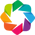

:Layout
   .DynamicMap.I :DynamicMap   []
      :Overlay
         .Image.I  :Image   [lon,lat]   (topo)
         .Points.I :Points   [ep_lon,ep_lat]   (mdb2,normalized)
   .Overlay.I    :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [ep_lon,ep_lat]   (mdb2,normalized)

In [117]:
import holoviews as hv
hv.extension('bokeh')
layout = hv.Layout(eq_plot1*eq_plot2 + eq_plot3).cols(1)
layout

In [45]:
import cartopy.crs as ccrs  

In [46]:
ds_bran['topo'].hvplot(x='lon', y='lat', geo=True, rasterize=True, projection=ccrs.UTM(21, southern_hemisphere=True, globe=None))* eqs_sub.hvplot.points(x='ep_lon',
                y='ep_lat', geo=True, rasterize = True,
                  color='index', cmap='colorwheel',
                  projection=ccrs.UTM(21, southern_hemisphere=True, globe=None))  


:DynamicMap   []
   :Overlay
      .Image.I  :Image   [lon,lat]   (topo)
      .Image.II :Image   [ep_lon,ep_lat]   (Count)

In [47]:
from geoviews.tile_sources import EsriImagery
topts = dict(width=700, height=600, bgcolor='black', xaxis=None, yaxis=None, show_grid=False)
tiles = EsriImagery.clone(ccrs=ccrs.GOOGLE_MERCATOR)

# Scratch 2 

In [ ]:
import urllib2

In [ ]:
import datetime as dt
from io import BytesIO

import numpy as np
import pandas as pd
import holoviews as hv

from matplotlib.image import imread
from mpl_toolkits.basemap import Basemap

hv.notebook_extension('bokeh', width=90)